<a href="https://colab.research.google.com/github/kaiquefreire05/facial-recognition-computer-vision/blob/main/facial_recognition_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reconhecimento facial usando visão computacional

# Treinamento

In [129]:
# Importações

from google.colab.patches import cv2_imshow
from PIL import Image # leitura de imagens
import numpy as np
import zipfile # descompactar base de dados
import os # acessar sistema operacional
import cv2

In [130]:
# Passando o caminho do arquivo ZIP
path = '/content/drive/MyDrive/datasets/yalefaces.zip'


with zipfile.ZipFile(path, mode='r') as zip_object: # abrindo o arquivo ZIP no modo de leitura
    zip_object.extractall('./') # extraindo todo o conteúdo do arquivo ZIP no diretório atual
zip_object.close() # fechando o arquivo ZIP

In [131]:
def dados_imagens():
    """
    Carrega as imagens do conjunto de dados Yale Faces e retorna os IDs e as imagens em arrays NumPy.

    **Argumentos**:
        Nenhum.

    **Retorna**:
    ids: Um array NumPy que contém os IDs das imagens.
    faces: Um array NumPy que contém as imagens em tons de cinza.
    """
    # Lista os arquivos no diretório de treinamento
    caminhos = [os.path.join('/content/yalefaces/train', f) for f in os.listdir('/content/yalefaces/train')]
    faces = []
    ids = []

    for caminho in caminhos:
        # Ignora o arquivo .ipynb_checkpoints
        if caminho == '/content/yalefaces/treinamento/.ipynb_checkpoints':
            continue

        imagem = Image.open(caminho).convert('L') # Carrega a imagem e converte para tons de cinza
        imagem_np = np.array(imagem, 'uint8') # Converte a imagem para um array NumPy
        id = int(os.path.split(caminho)[1].split('.')[0].replace('subject', '')) # Extrai o ID da imagem

        # armazena o ID e a imagem nas listas
        ids.append(id)
        faces.append(imagem_np)

    return np.array(ids), faces

In [132]:
ids, faces = dados_imagens()

In [133]:
# Fazendo treinamento

lbph = cv2.face.LBPHFaceRecognizer_create()
lbph.train(faces, ids)
lbph.write('classificadorLBPH.yml')

# Classificação

In [134]:
# Fazendo upload do arquivo já treinado

reconhecedor_facial = cv2.face.LBPHFaceRecognizer_create()
reconhecedor_facial.read('/content/classificadorLBPH.yml')

In [135]:
# Define o caminho para a imagem de teste
imagem_teste = '/content/yalefaces/test/subject10.sad.gif'

# Abre a imagem usando a biblioteca Pillow
imagem = Image.open(imagem_teste)

# Converte a imagem para tons de cinza
imagem = imagem.convert('L')

# Converte a imagem para um array NumPy
imagem_np = np.array(imagem, 'uint8')

# Imprime o array NumPy
print(imagem_np)

[[130 130 130 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 241 255 255]
 [255 255 255 ... 234 237 252]
 [ 68  68  68 ...  68  68  68]]


In [136]:
# Fazendo previsão

idprevisto, _ = reconhecedor_facial.predict(imagem_np)
idprevisto
# não irei usar o segundo argumento de retorno então coloquei '_'

10

In [137]:
# Obtendo o id correto para comparar

idcorreto = int(os.path.split(imagem_teste)[1].split('.')[0].replace('subject', ''))
idcorreto
# imagem_teste, é o caminho original da imagem

10

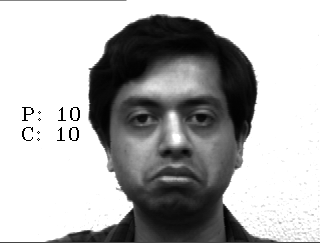

In [138]:
# Visualizar imagem e verificar se acertou ou não por meio da imagem

cv2.putText(imagem_np, 'P: ' + str(idprevisto), (x - 80, y - 80), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0)) # desenha o texto "P: " seguido do ID previsto na coordenada (x, y + 30)
cv2.putText(imagem_np, 'C: ' + str(idcorreto), (x - 80,y - 60), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 255, 0)) # desenha o texto "C: " seguido do ID correto na coordenada (x, y + 50)
cv2_imshow(imagem_np) # exibe a imagem com as anotações adicionadas